In [2]:
from __future__ import print_function
import librosa

In [3]:
file = librosa.util.example_audio_file()

In [4]:
y, sr = librosa.load(file)

In [5]:
import matplotlib.pyplot as plt

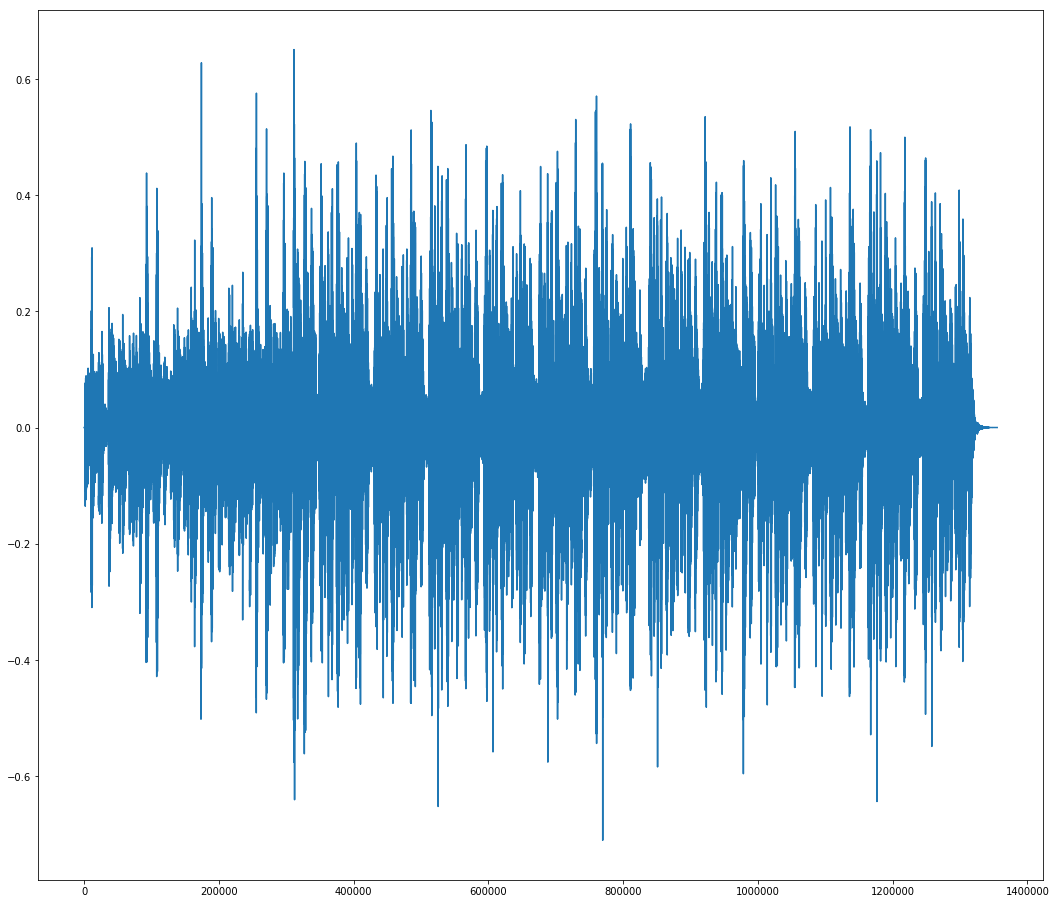

In [6]:
plt.figure(figsize=(18,16))
plt.plot(y)

In [7]:
tempo, beat_frames = librosa.beat.beat_track(y=y,sr=sr)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [8]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 129.20 beats per minute


In [9]:
beat_times = librosa.frames_to_time(beat_frames,sr=sr)
print('Saving output to beat_times.csv')

Saving output to beat_times.csv


In [10]:
librosa.output.times_csv('beat_times.csv', beat_times)

In [11]:
# Feature extraction example
import numpy as np
import librosa

# Load the example clip
y, sr = librosa.load(librosa.util.example_audio_file())

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


array([[ 0.31099305,  0.16985377,  0.16698188, ...,  0.10626479,
         0.27737542,  0.17305789],
       [ 0.27021626,  0.0971944 ,  0.12154318, ...,  0.08623495,
         0.1457301 ,  0.20282043],
       [ 0.48222909,  0.14248103,  0.16384441, ...,  0.05574904,
         0.07817243,  0.1582632 ],
       ...,
       [ 0.99674572, -0.36423064, -0.10523259, ..., -0.32319689,
         0.00457883,  0.09079093],
       [ 0.72024468, -0.37287624, -0.15919889, ...,  0.1073601 ,
        -0.33695637,  0.01822615],
       [ 0.76819923, -0.35960696, -0.20630982, ...,  0.066527  ,
        -0.05410505, -0.02263273]])